In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv

DIR_NAME = './redundancy/'
FIG_SIZE = (10, 5)
BAR_WIDTH = 0.2


def filter_files(filenames, filter_rules=None, separator=None):
    if filter_rules  is None:
        filter_rules = [('*', '', 'default')]  # (positive-key, negative-key, alias)
    if separator is None:
        separator = ''
    filenames_dict = {}
    for filter_rule in filter_rules:
        filenames_dict[filter_rule[2]] = []
    for filename in filenames:
        if os.path.splitext(filename)[1] != '.csv':
            continue
        filename_split = filename.rstrip('.csv').split(separator)
        for filter_rule in filter_rules:
            if filter_rule[0] in filename_split and filter_rule[1] not in filename_split:
                filenames_dict[filter_rule[2]].append(filename)
                break
    return filenames_dict

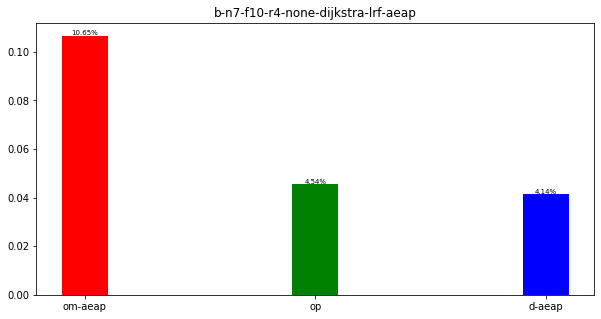

In [16]:
def v_pkt_loss_rate_per_flow(filename):
    pass

def v_pkt_loss_rate_per_test_case(filenames_dict):
    x = []
    y = []
    for alias, filenames in filenames_dict.items():
        filename = filenames[0]
        x.append(alias)
        with open(os.path.join(DIR_NAME, filename), 'r') as file:
            reader = csv.reader(file)
            all_no_of_sent_pkt = 0
            all_no_of_rcv_pkt = 0
            for line in reader:  # [fid, sent_pkt, rcv_pkt, no_of_flow]
                all_no_of_sent_pkt += int(line[1])
                all_no_of_rcv_pkt += int(line[2]) / int(line[3])
            pkt_loss_rate = (all_no_of_sent_pkt - all_no_of_rcv_pkt) / all_no_of_sent_pkt
            y.append(pkt_loss_rate)
    fig, ax = plt.subplots(figsize=FIG_SIZE)
    ax.set_title(filename.rstrip('.csv'))
    ax.bar(np.arange(len(x)), y, width=BAR_WIDTH, tick_label=x, label='pkt. loss rate', color=['r', 'g', 'b'])
    for a, b in zip(np.arange(len(x)), y):
        ax.text(a, b, '{:.2%}'.format(b), ha='center', va='bottom', fontsize=7)
    plt.show()
        
filenames = os.listdir(DIR_NAME)
filenames_dict = filter_files(filenames,  filter_rules=[
    ('backtracking', 'o', 'om-aeap'), ('o', 'b', 'op'), ('dijkstra', 'o', 'd-aeap')], separator='-')

v_pkt_loss_rate_per_test_case(filenames_dict)
